# **Lista 5** 
### Rafał Głodek
***

Zadanie 1

In [1]:
import graphviz, sys

In [2]:
class Vertex():
    def __init__(self, key):
        self.id = key
        self.neighbors = {}

    def add_neighbor(self, value, weight):
        self.neighbors[value] = weight
    
    def __str__(self):
        return "Node: " + str(self.id) + " Neighbors: " + str([i.id for i in self.neigbors])

    def get_neighbors(self):
        return [i.id for i in self.neighbors]
    
    def get_id(self):
        return self.id
    
    def get_weight(self, neighbor):
        return self.neighbors[neighbor]

    def set_distance(self, d):
        self.dist = d
    
    def get_distance(self):
        return self.dist
    
    def set_pred(self,p):
        self.pred = p

    def get_pred(self):
        return self.pred

In [3]:
from collections import deque

In [4]:
class Graph(Vertex):
    def __init__(self):
        self.vertices = {}
        self.size = 0

    def add_vertex(self, vert_key):
        vertex = Vertex(vert_key)
        self.vertices[vert_key] = vertex
        self.size += 1
        return vertex
    
    def __contains__(self, vert_key):
        return vert_key in self.vertices
    
    def vertex(self, vert_key):
        if vert_key in self.vertices:
            return self.vertices[vert_key]
        else:
            return None
        
    def get_neighbors(self, vert_key):
        if vert_key in self.vertices:
            return self.vertices[vert_key].get_neighbors()
        else:
            return None

    def get_vertices(self):
        return [x for x in self.vertices]
    
    def add_edge(self, from_key, to_key, weight=0):
        if from_key not in self.vertices:
            self.add_vertex(from_key)
        if to_key not in self.vertices:
            self.add_vertex(to_key)
        self.vertices[from_key].add_neighbor(self.vertices[to_key], weight)
    
    def get_edges(self):
        edges = []
        for vert in self.vertices:
            neighbors = self.vertices[vert].get_neighbors()
            if not neighbors is None:
                for n in neighbors:
                    edges.append([str(vert), str(n)])
        return edges
    
    def visualize(self):
        dot = graphviz.Digraph()
        for vert in self.vertices:
            dot.node(str(vert), str(vert))
        for edge in self.get_edges():
            dot.edge(str(edge[0]), str(edge[1]))
        return dot
        
    def bfs(self, start):
        visited = [start]
        self.vertices[start].set_distance(0)
        self.vertices[start].set_pred(None)
        q = []
        q.append(start)
        while len(q):
            vert = q.pop(0)
            neighbors = self.vertices[vert].get_neighbors()
            for neighbor in neighbors:
                if not neighbor in visited:
                    q.append(neighbor)
                    visited.append(neighbor)
                    self.vertices[neighbor].set_distance(self.vertices[vert].get_distance() + 1)
                    self.vertices[neighbor].set_pred(vert)

        dists = []
        preds = []
        for vert in visited:
            preds1 = [vert]
            dists.append(self.vertices[vert].get_distance())
            pred = self.vertices[vert].get_pred()
            while pred != None:
                preds1.append(pred)
                pred = self.vertices[pred].get_pred()
            preds.append(preds1[::-1])

        return visited, dists, preds

    def dfs(self, start, visited = []):
        if not start in visited:
            visited.append(start)
        neighbors = self.vertices[start].get_neighbors()
        for neighbor in neighbors:
            if not neighbor in visited:
                self.dfs(neighbor, visited)
        return visited

    def dfs_topological_sort(self, start, stack, visited = []):
        if not start in visited:
            visited.append(start)
        neighbors = self.vertices[start].get_neighbors()
        for neighbor in neighbors:
            if not neighbor in visited:
                self.dfs_topological_sort(neighbor, stack, visited)
        stack.append(start)

    def topological_sort(self):
        visited = []
        stack = []

        for vert in self.get_vertices():
            if not vert in visited:
                self.dfs_topological_sort(vert, stack, visited)
        
        return stack[::-1]
    
    def shortest_paths(self, vert):
        verts, dists, paths = self.bfs(vert)
        for i in range(len(verts)):
            path = ""
            for j in range(len(paths[i])):
                if j != len(paths[i]) - 1:
                    path += str(paths[i][j]) + " -> "
                else:
                    path += str(paths[i][j])
            print("Shortest distance from " + str(vert) + " to " + str(verts[i]) + " is " + str(dists[i]) + ". Path: " + path)
        

In [86]:
g = Graph()
g.add_edge(0, 1)
g.add_edge(1, 12)
g.add_edge(2, 0)
g.add_edge(2, 3)
g.add_edge(2,1)
g.add_edge(3, 4)
g.add_edge(4, 7)
g.add_edge(4, 12)
g.add_edge(7, 8)
print(g.get_edges())

[['0', '1'], ['1', '12'], ['2', '0'], ['2', '3'], ['2', '1'], ['3', '4'], ['4', '7'], ['4', '12'], ['7', '8']]


Zadanie 2

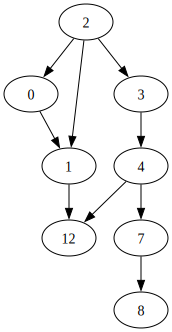

In [87]:
g.visualize()

Zadanie 3

In [89]:
g.bfs(2)[0]

[2, 0, 3, 1, 4, 12, 7, 8]

In [90]:
g.dfs(2)

[2, 0, 1, 12, 3, 4, 7, 8]

Zadanie 4

In [91]:
g.topological_sort()

[2, 3, 4, 7, 8, 0, 1, 12]

Zadanie 5

In [92]:
g.shortest_paths(2)

Shortest distance from 2 to 2 is 0. Path: 2
Shortest distance from 2 to 0 is 1. Path: 2 -> 0
Shortest distance from 2 to 3 is 1. Path: 2 -> 3
Shortest distance from 2 to 1 is 1. Path: 2 -> 1
Shortest distance from 2 to 4 is 2. Path: 2 -> 3 -> 4
Shortest distance from 2 to 12 is 2. Path: 2 -> 1 -> 12
Shortest distance from 2 to 7 is 3. Path: 2 -> 3 -> 4 -> 7
Shortest distance from 2 to 8 is 4. Path: 2 -> 3 -> 4 -> 7 -> 8


Zadanie 6

In [53]:
G = Graph()
G.add_vertex((3,3,1))

In [36]:
def boat_ok(a):
    boat = a[2]
    if boat in [1,0]:
        return True
    else:
        return False

In [37]:
def missionaries_ok(a):
    mis = a[0]
    can = a[1]
    if mis in [0,1,2,3] and can in [0,1,2,3]:
        if (mis, can) in [(3,3), (2,2), (3,0), (0,3), (3,1), (1,1), (0,0), (3,2), (0,2), (0,1)]:
            return True
        else:
            return False
    else:
        return False

In [38]:
positions = [(1,0,1), (2,0,1), (0,1,1), (0,2,1), (1,1,1)]

In [54]:
run = True

while run:
    routes = G.bfs((3,3,1))[0]
    for route in routes:
        if len(G.get_neighbors(route)) == 0:
            for pos in positions:
                if route[2] == 0:
                    b = (route[0]+pos[0], route[1]+pos[1], route[2]+pos[2])
                    if boat_ok(b) and missionaries_ok(b):
                            if b == (0,0,0):
                                run = False
                            G.add_edge(route, b)
                            
                if route[2] == 1:
                    a = (route[0]-pos[0], route[1]-pos[1], route[2]-pos[2])
                    if boat_ok(a) and missionaries_ok(a):
                            if a == (0,0,0):
                                run = False
                            G.add_edge(route, a)
                            
                    



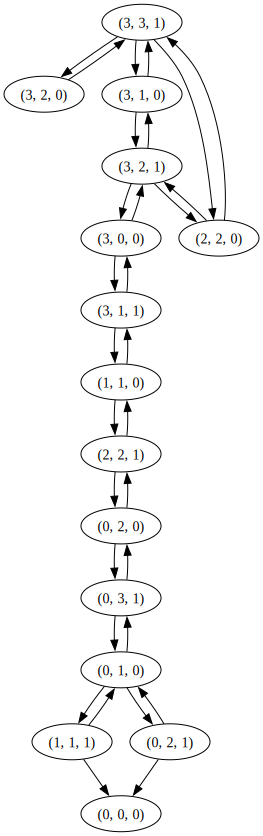

In [55]:
G.visualize()

Zadanie 7

In [35]:
G2 = Graph()
G2.add_vertex((0,0))

In [6]:
def is_okay(a):
    if a[0] in [0,1,2,3] and a[1] in [0,1,2,3,4]:
        return True
    else:
        return False

In [15]:
def left_to_right(b):
    free_right = 4 - b[1]
    if b[0] - free_right >= 0:
        a = (b[0] - free_right, 4)
    else:
        a = (0, b[1] + b[0])
    return a

In [16]:
def right_to_left(b):
    free_left = 3 - b[0]
    if b[1] - free_left >= 0:
        a = (3, b[1] - free_left)
    else:
        a = (b[0] + b[1], 0)
    return a

In [10]:
def spill_left(a):
    return (0, a[1])

In [11]:
def spill_right(a):
    return (a[0], 0)

In [12]:
def fill_left(a):
    return (3, a[1])

In [13]:
def fill_right(a):
    return (a[0], 4)

In [36]:
run = True

while run:
    routes = G2.bfs((0,0))[0]
    for route in routes:
        if len(G2.get_neighbors(route)) == 0:
            a = spill_left(route)
            b = spill_right(route)
            c = fill_left(route)
            d = fill_right(route)
            e = left_to_right(route)
            f = right_to_left(route)
            for pos in [a,b,c,d,e,f]:
                if pos != route:
                    if is_okay(pos):
                        if pos[0] == 2 or pos[1] == 2:
                            run = False
                        G2.add_edge(route, pos)
                        

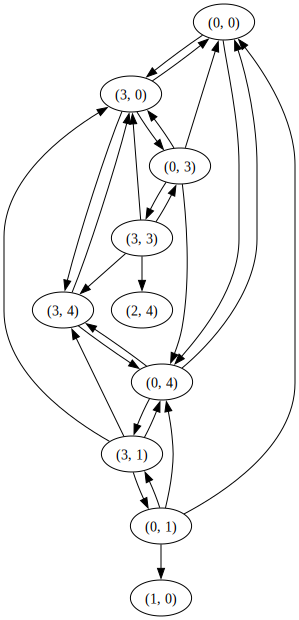

In [37]:
G2.visualize()